# Real-time path-tracing denoising

Vincent Higginson

In [4]:
import skimage
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
import os
import struct
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def load_image(path):
    buffer = open(path, "rb")
    data = buffer.read()
    num_floats = len(data) // 16
    pixels = np.array(struct.unpack('f'*num_floats*4, data), dtype=np.float32)
    pixels = np.flipud(np.reshape(pixels, (720, 1280, 4)))
    img = cv2.cvtColor(pixels, cv2.COLOR_RGBA2RGB)

    buffer.close()

    return img

## Ground truth images

Loaded from a 1024spp renderings.No denoising applied, just an accumulation of the results of 1024 frames.

Disposition of the camera for the Sponza scene:

```cpp
camera.angle = 0.0f;
camera.speed = 0.0f;
camera.distance = 1.0f;
camera.center = glm::vec3(0.0f, 1.0f, 0.0f);
```

Disposition of the camera for the DeleteMe scene:

```cpp
camera.angle = 45.0f;
camera.speed = 0.0f;
camera.distance = 10.0f;
camera.center = glm::vec3(0.0f, 1.0f, 0.0f);
```

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


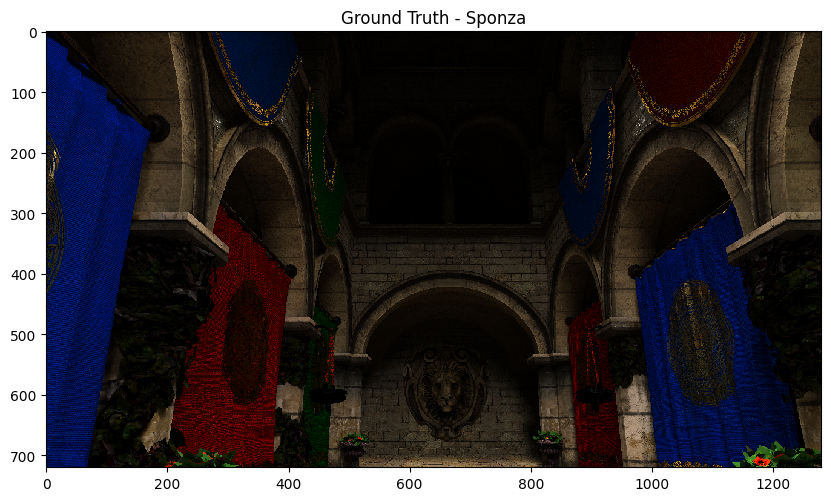

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


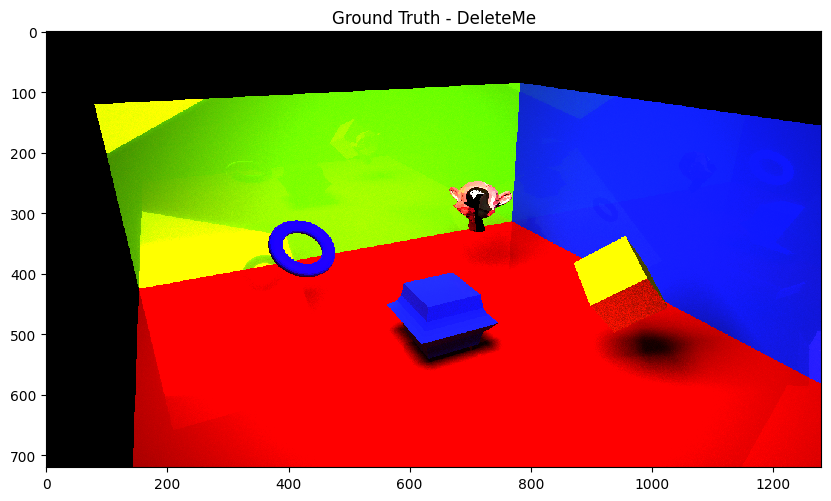

FileNotFoundError: [Errno 2] No such file or directory: 'blobs/dragon_blob_1024_accum.buff'

In [6]:
sponza_ground_truth = load_image("blobs/sponza_blob_1024_accum.buff")

plt.figure(figsize = (10, 10))
plt.imshow(sponza_ground_truth, interpolation='nearest')
plt.title('Ground Truth - Sponza')
plt.show()

deleteme_ground_truth = load_image("blobs/deleteme_blob_1024_accum.buff")

plt.figure(figsize = (10, 10))
plt.imshow(deleteme_ground_truth, interpolation='nearest')
plt.title('Ground Truth - DeleteMe')
plt.show()

dragon_ground_truth = load_image("blobs/dragon_blob_1024_accum.buff")

plt.figure(figsize = (10, 10))
plt.imshow(dragon_ground_truth, interpolation='nearest')
plt.title('Ground Truth - Dragon')
plt.show()

## BMFR images

Different denoising configurations for the sponza scene. All denoised with BMFR. The 15th frame is used to make the comparison with the ground truth.

SSIM (structural similarity) and MSE (mean-squared error) are computed and plotted for each configurations.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


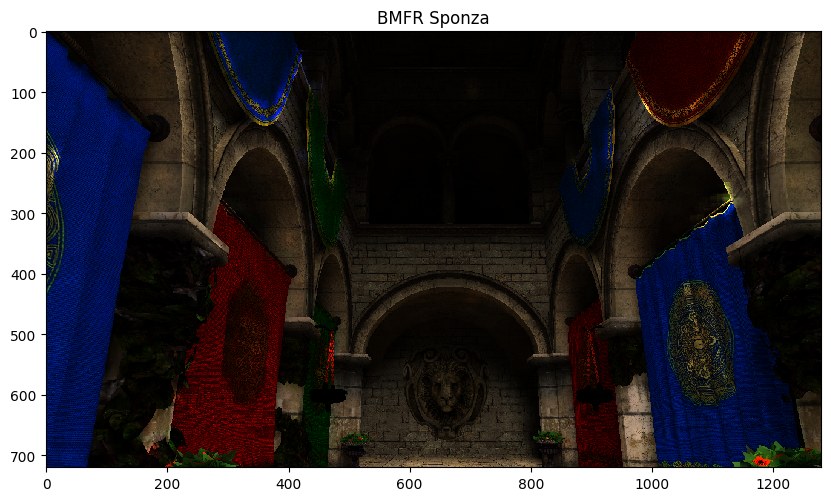

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


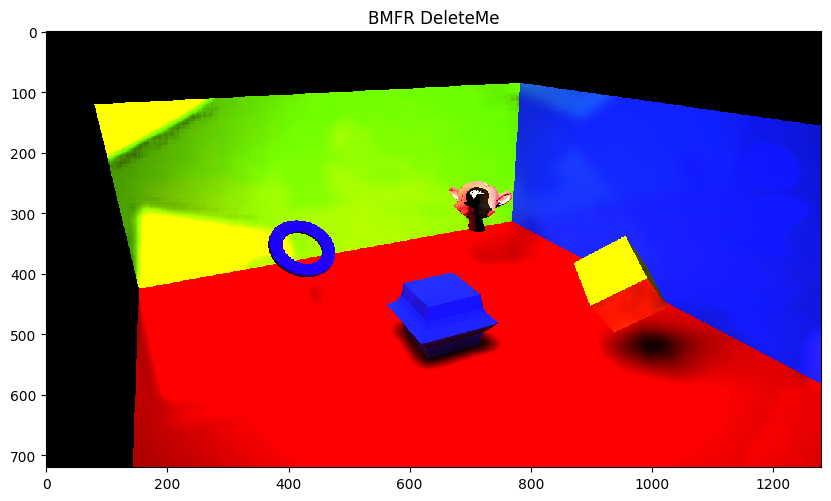

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


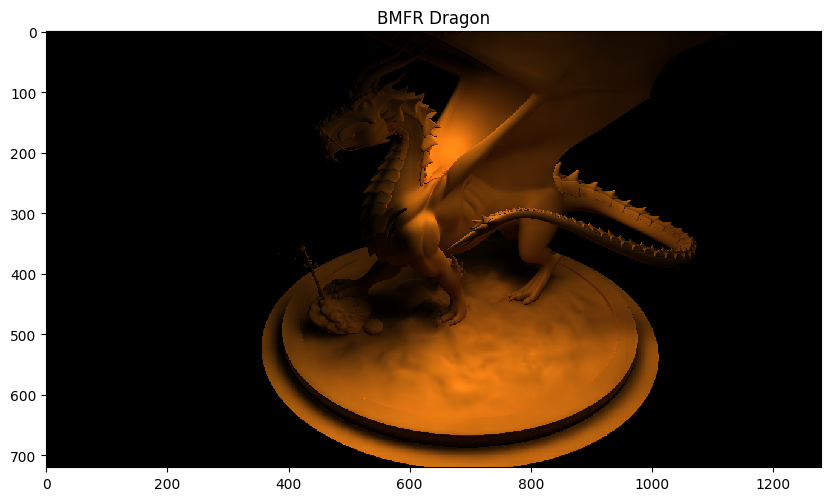

In [ ]:
sponza_bmfr = load_image("blobs/sponza_blob_15_bmfr.buff")
deleteme_bmfr = load_image("blobs/deleteme_blob_15_bmfr.buff")
dragon_bmfr = load_image("blobs/dragon_blob_15_bmfr.buff")

plt.figure(figsize = (10, 10))
plt.imshow(sponza_bmfr, interpolation='nearest')
plt.title('BMFR Sponza')
plt.show()

plt.figure(figsize = (10, 10))
plt.imshow(deleteme_bmfr, interpolation='nearest')
plt.title('BMFR DeleteMe')
plt.show()

plt.figure(figsize = (10, 10))
plt.imshow(dragon_bmfr, interpolation='nearest')
plt.title('BMFR Dragon')
plt.show()

In [ ]:
score_sponza_ssim_bmfr = ssim(sponza_ground_truth, sponza_bmfr, multichannel=True, channel_axis=2, data_range=sponza_ground_truth.max()-sponza_ground_truth.min())
score_sponza_mse_bmfr = mse(sponza_ground_truth, sponza_bmfr)

score_deleteme_ssim_bmfr = ssim(deleteme_ground_truth, deleteme_bmfr, multichannel=True, channel_axis=2, data_range=sponza_ground_truth.max()-sponza_ground_truth.min())
score_deleteme_mse_bmfr = mse(deleteme_ground_truth, deleteme_bmfr)

score_dragon_ssim_bmfr = ssim(dragon_ground_truth, dragon_bmfr, multichannel=True, channel_axis=2, data_range=sponza_ground_truth.max()-sponza_ground_truth.min())
score_dragon_mse_bmfr = mse(dragon_ground_truth, dragon_bmfr)

print("SSIM sponza:", score_sponza_ssim_bmfr)
print("MSE sponza:", score_sponza_mse_bmfr)

print("SSIM deleteme:", score_deleteme_ssim_bmfr)
print("MSE deleteme:", score_deleteme_mse_bmfr)

print("SSIM dragon:", score_dragon_ssim_bmfr)
print("MSE dragon:", score_dragon_mse_bmfr)

SSIM sponza: 0.9583216
MSE sponza: 0.0009985595222815882
SSIM deleteme: 0.95581
MSE deleteme: 0.036787547215525206
SSIM dragon: 0.98596543
MSE dragon: 0.0002081820750524717


## A-SVGF image - Sponza

Different denoising configurations for the sponza scene. All denoised with A-SVGF. The 15th frame is used to make the comparison with the ground truth.

SSIM (structural similarity) and MSE (mean-squared error) are computed and plotted for each configurations.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


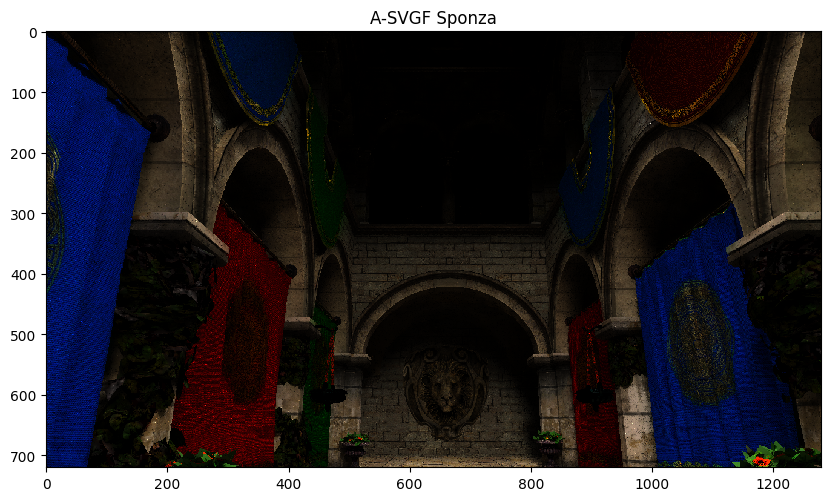

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


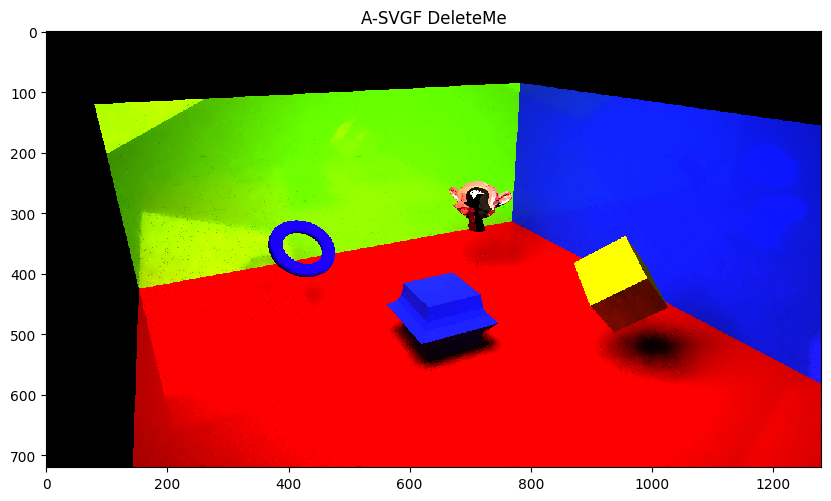

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


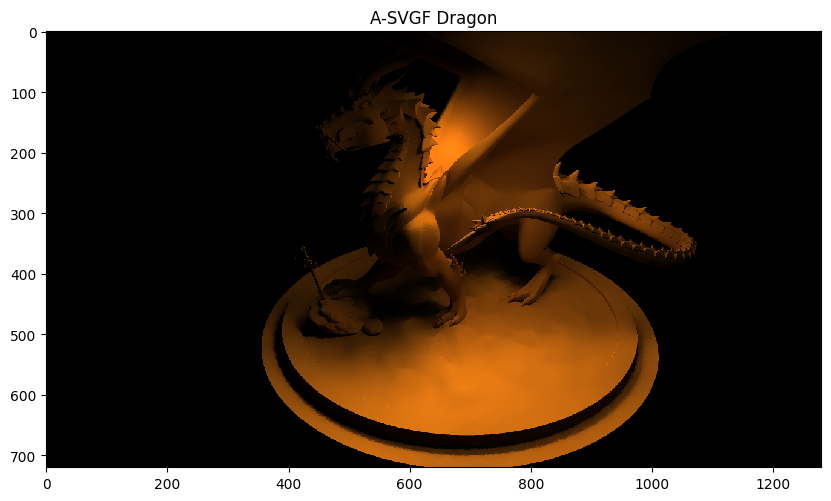

In [ ]:
sponza_asvgf = load_image("blobs/sponza_blob_15_a-svgf.buff")
deleteme_asvgf = load_image("blobs/deleteme_blob_15_a-svgf.buff")
dragon_asvgf = load_image("blobs/dragon_blob_15_a-svgf.buff")

plt.figure(figsize = (10, 10))
plt.imshow(sponza_asvgf, interpolation='nearest')
plt.title('A-SVGF Sponza')
plt.show()

plt.figure(figsize = (10, 10))
plt.imshow(deleteme_asvgf, interpolation='nearest')
plt.title('A-SVGF DeleteMe')
plt.show()

plt.figure(figsize = (10, 10))
plt.imshow(dragon_asvgf, interpolation='nearest')
plt.title('A-SVGF Dragon')
plt.show()

In [ ]:
score_sponza_ssim_asvgf = ssim(sponza_ground_truth, sponza_asvgf, multichannel=True, channel_axis=2, data_range=sponza_ground_truth.max()-sponza_ground_truth.min())
score_sponza_mse_asvgf = mse(sponza_ground_truth, sponza_asvgf)
score_deleteme_ssim_asvgf = ssim(deleteme_ground_truth, deleteme_asvgf, multichannel=True, channel_axis=2, data_range=sponza_ground_truth.max()-sponza_ground_truth.min())
score_deleteme_mse_asvgf = mse(deleteme_ground_truth, deleteme_asvgf)
score_dragon_ssim_asvgf = ssim(dragon_ground_truth, dragon_asvgf, multichannel=True, channel_axis=2, data_range=sponza_ground_truth.max()-sponza_ground_truth.min())
score_dragon_mse_asvgf = mse(dragon_ground_truth, dragon_asvgf)

print("SSIM sponza:", score_sponza_ssim_asvgf)
print("MSE sponza:", score_sponza_mse_asvgf)

print("SSIM deleteme:", score_deleteme_ssim_asvgf)
print("MSE deleteme:", score_deleteme_mse_asvgf)

print("SSIM dragon:", score_dragon_ssim_asvgf)
print("MSE dragon:", score_dragon_mse_asvgf)

SSIM sponza: 0.93622476
MSE sponza: 0.000667992127933576
SSIM deleteme: 0.9444096
MSE deleteme: 0.0077440428746954944
SSIM dragon: 0.9886506
MSE dragon: 0.00014765861303902048


## OIDN image - Sponza

Different denoising configurations for the sponza scene. All denoised with OIDN. The 15th frame is used to make the comparison with the ground truth.

SSIM (structural similarity) and MSE (mean-squared error) are computed and plotted for each configurations.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


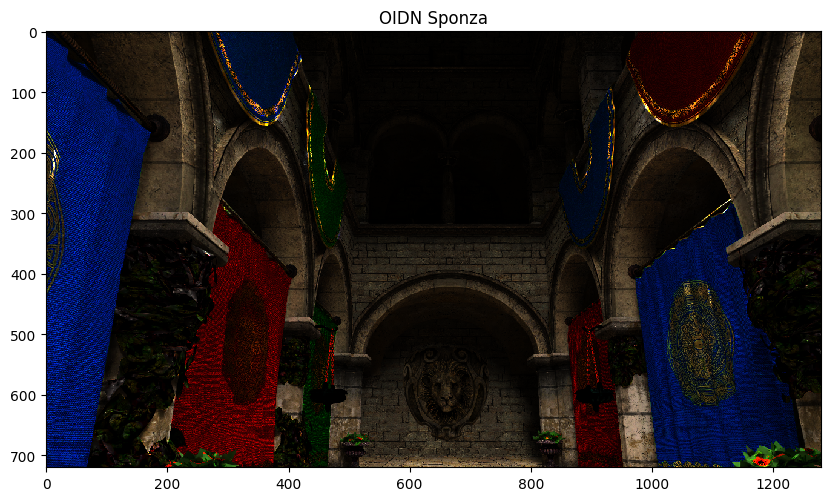

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


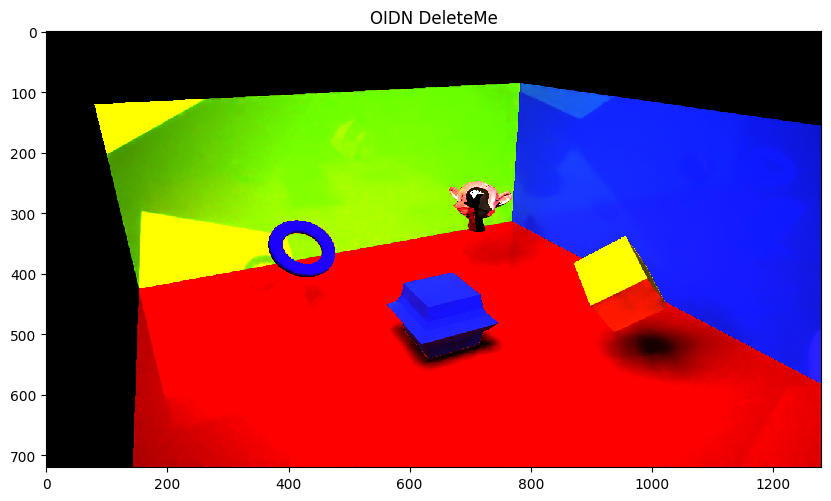

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


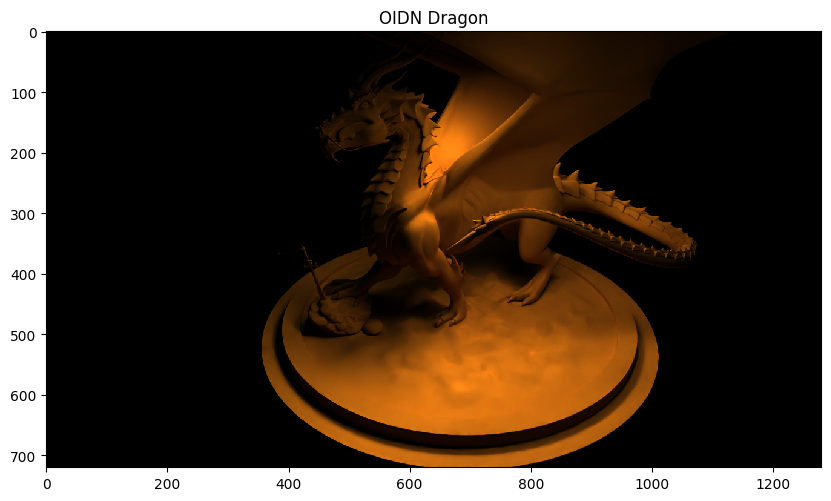

In [ ]:
sponza_oidn = load_image("blobs/sponza_blob_15_oidn.buff")
deleteme_oidn = load_image("blobs/deleteme_blob_15_oidn.buff")
dragon_oidn = load_image("blobs/dragon_blob_15_oidn.buff")

plt.figure(figsize = (10, 10))
plt.imshow(sponza_oidn, interpolation='nearest')
plt.title('OIDN Sponza')
plt.show()

plt.figure(figsize = (10, 10))
plt.imshow(deleteme_oidn, interpolation='nearest')
plt.title('OIDN DeleteMe')
plt.show()

plt.figure(figsize = (10, 10))
plt.imshow(dragon_oidn, interpolation='nearest')
plt.title('OIDN Dragon')
plt.show()

In [ ]:
score_sponza_ssim_oidn = ssim(sponza_ground_truth, sponza_oidn, multichannel=True, channel_axis=2, data_range=sponza_ground_truth.max()-sponza_ground_truth.min())
score_sponza_mse_oidn = mse(sponza_ground_truth, sponza_oidn)
score_deleteme_ssim_oidn = ssim(deleteme_ground_truth, deleteme_oidn, multichannel=True, channel_axis=2, data_range=sponza_ground_truth.max()-sponza_ground_truth.min())
score_deleteme_mse_oidn = mse(deleteme_ground_truth, deleteme_oidn)
score_dragon_ssim_oidn = ssim(dragon_ground_truth, dragon_oidn, multichannel=True, channel_axis=2, data_range=sponza_ground_truth.max()-sponza_ground_truth.min())
score_dragon_mse_oidn = mse(dragon_ground_truth, dragon_oidn)

print("SSIM sponza:", score_sponza_ssim_oidn)
print("MSE sponza:", score_sponza_mse_oidn)

print("SSIM deleteme:", score_deleteme_ssim_oidn)
print("MSE deleteme:", score_deleteme_mse_oidn)

print("SSIM dragon:", score_dragon_ssim_oidn)
print("MSE dragon:", score_dragon_mse_oidn)

SSIM sponza: 0.95977473
MSE sponza: 0.00236157586649319
SSIM deleteme: 0.95433927
MSE deleteme: 0.03719294785351623
SSIM dragon: 0.9903335
MSE dragon: 0.00012835208637286438


## Overall comparison

Plotting of the SSIM, and MSE of the best configuration of each denoising technique.

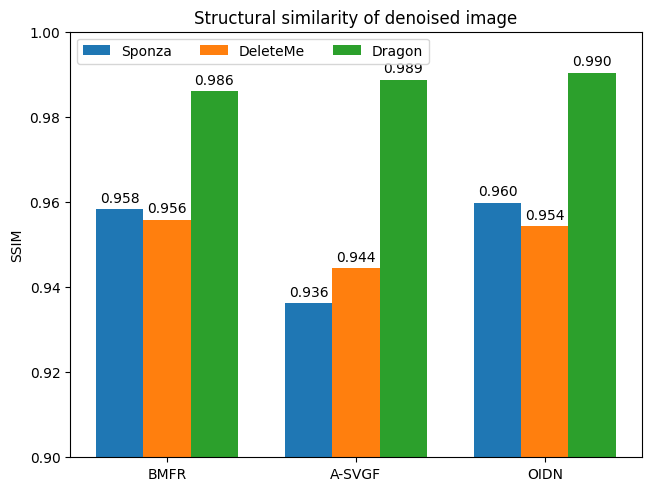

In [ ]:
species = ("BMFR", "A-SVGF", "OIDN")
penguin_means = {
    'Sponza': [score_sponza_ssim_bmfr, score_sponza_ssim_asvgf, score_sponza_ssim_oidn],
    'DeleteMe': [score_deleteme_ssim_bmfr, score_deleteme_ssim_asvgf, score_deleteme_ssim_oidn],
    'Dragon': [score_dragon_ssim_bmfr, score_dragon_ssim_asvgf, score_dragon_ssim_oidn],
}

# i = 0
# for u in penguin_means["Sponza"]:
#     penguin_means["Sponza"][i] = round(u, 3)
#     i += 1

# i = 0
# for u in penguin_means["DeleteMe"]:
#     penguin_means["DeleteMe"][i] = round(u, 4)
#     i += 1


x = np.arange(len(species))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt='%.3f')
    multiplier += 1

ax.set_ylabel('SSIM')
ax.set_title('Structural similarity of denoised image')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0.9, 1.0)

plt.show()